In [125]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [126]:
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, WeightedRandomSampler

In [127]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=384x512 at 0x7F3C15293070>


# train csv 불러오기

In [128]:
train_df = pd.read_csv('/opt/ml/code/data/train/train.csv')
train_df

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [130]:
train_df.describe(include='all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,000001_female_Asian_45
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


In [131]:
train_label_df= pd.read_csv('/opt/ml/code/data processing/EDA & Preprocessing/train_label.csv')
train_label_df

,path,label
0,/opt/ml/code/data/train/images/000001_female_A...,4
1,/opt/ml/code/data/train/images/000001_female_A...,4
2,/opt/ml/code/data/train/images/000001_female_A...,4
3,/opt/ml/code/data/train/images/000001_female_A...,4
4,/opt/ml/code/data/train/images/000001_female_A...,16
...,...,...
18895,/opt/ml/code/data/train/images/006959_male_Asi...,0
18896,/opt/ml/code/data/train/images/006959_male_Asi...,0
18897,/opt/ml/code/data/train/images/006959_male_Asi...,12
18898,/opt/ml/code/data/train/images/006959_male_Asi...,0


# gender별 value counts

In [132]:
import seaborn as sns

In [133]:
group_gender = train_df['gender'].value_counts()
display(group_gender)

female    1658
male      1042
Name: gender, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

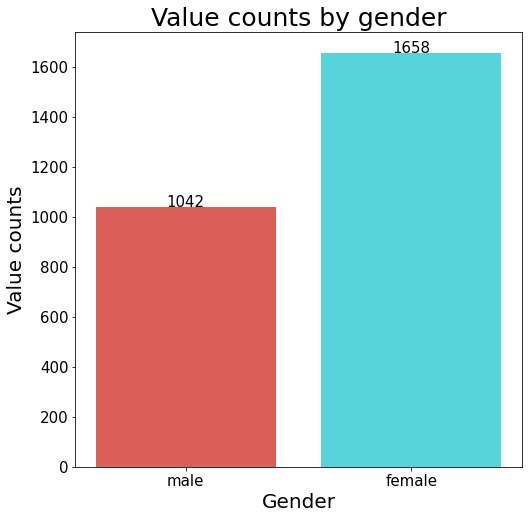

In [134]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('hls', 2)
plt.bar(['male', 'female'], [group_gender['male'], group_gender['female']], color=colors)
plt.title('Value counts by gender', fontsize=25)

plt.text(x='male', y=group_gender['male'], s=group_gender['male'], fontsize=15, ha='center')
plt.text(x='female', y=group_gender['female'], s=group_gender['female'], fontsize=15, ha='center')

plt.xlabel('Gender', fontsize=20)
plt.ylabel('Value counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [152]:
pd.DataFrame([group_gender['male'], group_gender['female']], index=['male', 'female'], columns=['value counts'])

,value counts
male,1042
female,1658


# 나이대별 value counts

## 전연령 별로

In [167]:
import seaborn as sns

In [174]:
train_df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

In [179]:
train_df.sort_values(by='age')

,id,gender,race,age,path
2467,006440,female,Asian,18,006440_female_Asian_18
2489,006468,female,Asian,18,006468_female_Asian_18
2488,006467,female,Asian,18,006467_female_Asian_18
2487,006466,female,Asian,18,006466_female_Asian_18
2486,006465,female,Asian,18,006465_female_Asian_18
...,...,...,...,...,...
1053,001920,female,Asian,60,001920_female_Asian_60
1564,003718,female,Asian,60,003718_female_Asian_60
1565,003719,male,Asian,60,003719_male_Asian_60
543,001175,male,Asian,60,001175_male_Asian_60


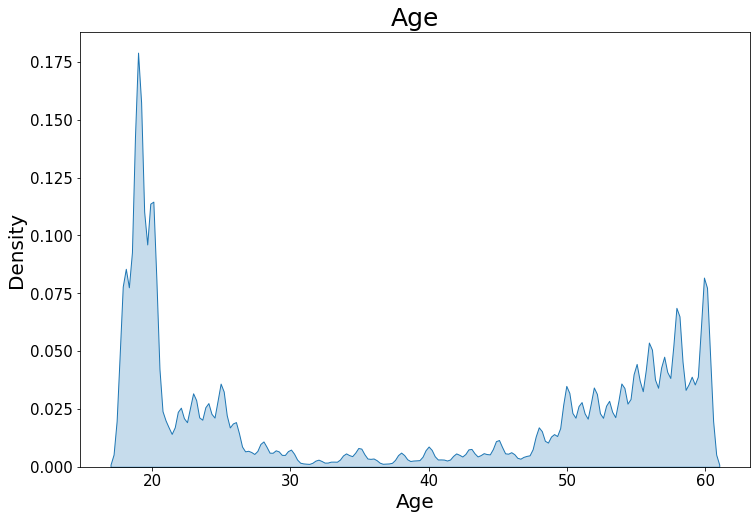

In [187]:
plt.figure(figsize=(12, 8))
sns.kdeplot(train_df['age'], fill=True, bw_method=0.02)
plt.title('Age', fontsize=25)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 전연령대별 성별 

In [219]:
train_df.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,1658.0,38.528347,16.888379,18.0,20.0,44.0,55.0,60.0
male,1042.0,36.403071,17.066934,18.0,20.0,26.0,56.0,60.0


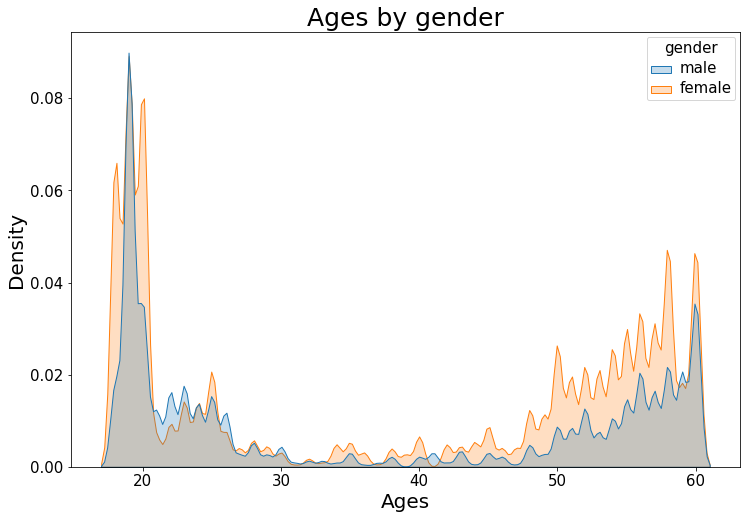

In [322]:
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(x='age', data=train_df, fill=True, bw_method=0.02,  hue='gender', hue_order=sorted(train_df['gender'].unique(), reverse=True))
plt.title('Ages by gender', fontsize=25)
plt.xlabel('Ages', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.show()

## 연령대 class 별로

In [251]:
train_df['age_class'] = ""

In [149]:
pd.DataFrame(y_ages, index = x_ages, columns =['value counts'])

,value counts
<30,1281
>=30 and < 60,1227
>=60,192


In [323]:
plt.figure(figsize=(8, 8))
for i in range(len(train_df)):
    if train_df.iloc[i]['age'] < 30 : train_df['age_class'].iloc[i] = '<30'
    elif train_df.iloc[i]['age'] >= 60 : train_df['age_class'].iloc[i] = '>=60'
    else : train_df['age_class'].iloc[i] = '>=30 and < 60'

/tmp/ipykernel_2212/240626329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else : train_df['age_class'].iloc[i] = '>=30 and < 60'
/tmp/ipykernel_2212/240626329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if train_df.iloc[i]['age'] < 30 : train_df['age_class'].iloc[i] = '<30'
/tmp/ipykernel_2212/240626329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elif train_df.iloc[i]['age'] >= 60 : train_df['age_class'].iloc[i]

<Figure size 576x576 with 0 Axes>

In [324]:
train_df.groupby('age_class')['id'].count()

age_class
<30              1281
>=30 and < 60    1227
>=60              192
Name: id, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

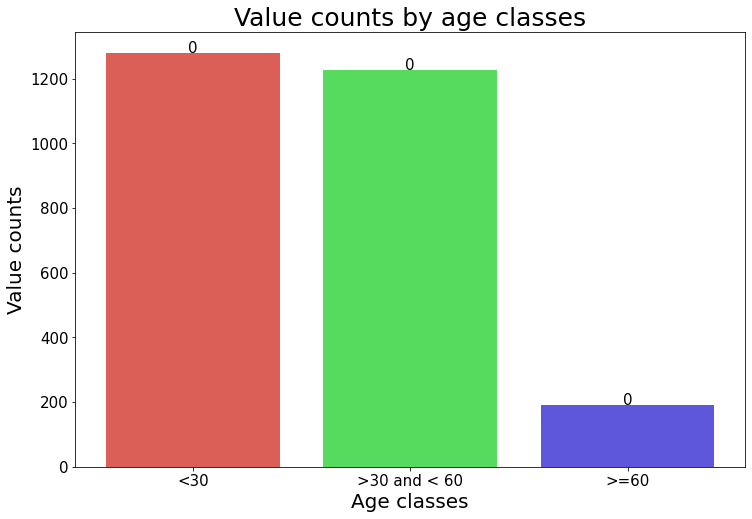

In [ ]:
x_ages = ['<30', '>30 and < 60', '>=60']
y_ages = train_df.groupby('age_class')['id'].count()

plt.figure(figsize=(12, 8))
colors = sns.color_palette('hls', 3)
plt.bar(x_ages, y_ages, color=colors)
plt.title('Value counts by age classes', fontsize=25)
for x, y in zip(x_ages, y_ages):
    plt.text(x=x, y=y, s=count, fontsize=15, ha='center')
plt.xlabel('Age classes', fontsize=20)
plt.ylabel('Value counts', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# 연령대 Class별 성별

In [326]:
train_df.groupby(['age_class', 'gender']).count()

id  race  age  path
age_class     gender                      
<30           female  732   732  732   732
              male    549   549  549   549
>=30 and < 60 female  817   817  817   817
              male    410   410  410   410
>=60          female  109   109  109   109
              male     83    83   83    83

[None, None]

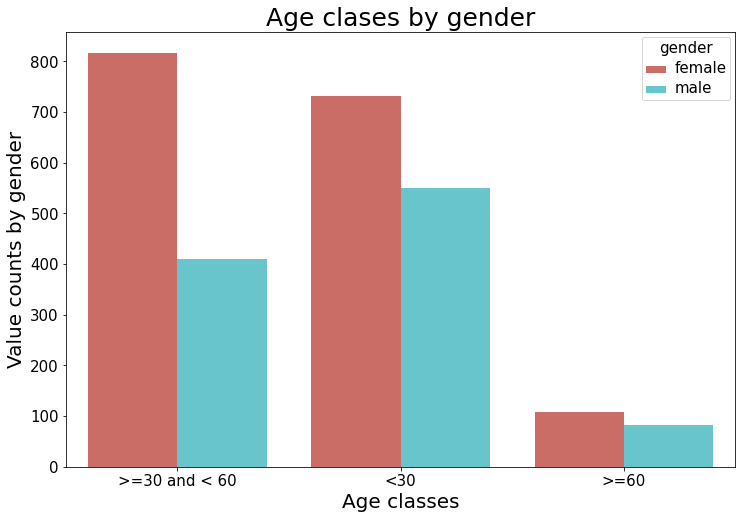

In [333]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age_class', data=train_df, hue='gender', palette='hls')
plt.title('Age clases by gender', fontsize=25)
plt.xlabel('Age classes', fontsize=20)
plt.ylabel('Value counts by gender', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title

# Class 별 value counts

In [166]:
pd.DataFrame(y_classes)

,label
0,2745
1,2050
2,415
3,3660
4,4085
5,545
6,549
7,410
8,83
9,732


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

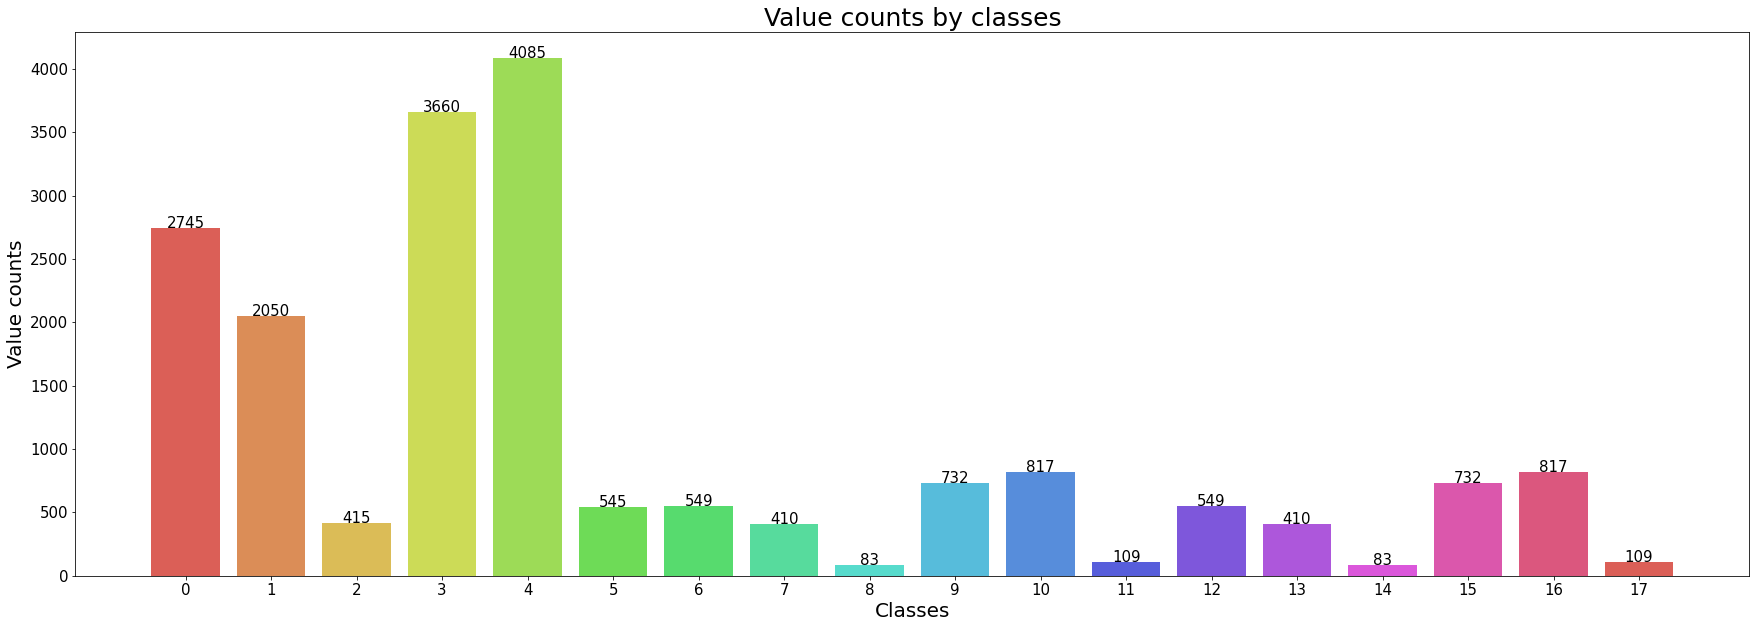

In [158]:
sequential_cm_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
x_classes = sorted(train_label_df['label'].unique())
y_classes = train_label_df['label'].value_counts().sort_index()

plt.figure(figsize=(30, 10))
colors = sns.color_palette('hls', 17)
plt.bar(x_classes, y_classes, color=colors)
plt.title('Value counts by classes', fontsize=25)
for x, y in zip(x_classes, y_classes):
    plt.text(x=x, y=y, s=y, fontsize=15, ha='center')
plt.xlabel('Classes', fontsize=20)
plt.ylabel('Value counts', fontsize=20)
plt.xticks(sorted(train_label_df['label'].unique()), fontsize=15)
plt.yticks(fontsize=15)

In [160]:
y_classes

0     2745
1     2050
2      415
3     3660
4     4085
5      545
6      549
7      410
8       83
9      732
10     817
11     109
12     549
13     410
14      83
15     732
16     817
17     109
Name: label, dtype: int64